In [1]:
!pip install gym[classic_control]
!pip install tqdm
!pip install gym[box2d]

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import gym
import random
from tqdm import tqdm
import matplotlib.pyplot as plt 
import random
import math
# import progressbar
import time

/home/rahul/.local/lib/python3.6/site-packages/gym/core.py:26: UserWarning: WARN: Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+
  "Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+"


In [3]:
env_name = "Acrobot-v1"
render_Mode = "human"
# env = gym.make(env_name)

In [4]:
def getAngle(cos_val, sin_val):   
    a_acos = math.acos(cos_val)
    angle = 0
    if sin_val < 0:
        angle = math.degrees(-a_acos) % 360
    else: 
        angle = math.degrees(a_acos)
    return angle

In [5]:
def transformObs(obs):
    ang1 = int(getAngle(obs[0], obs[1])/5)
    ang2 = int(getAngle(obs[2], obs[3])/5)
    new_obs = []
    new_obs.append(ang1)
    new_obs.append(ang2)
    new_obs.append(int((obs[4] + 12.57)))
    new_obs.append(int((obs[5] + 28.28)))
    return new_obs

In [6]:
q = [[[[[0 for _ in range(3)] for _ in range(57)] for _ in range(26)] for _ in range(72)] for _ in range(72)]

In [7]:
next_state = [[[[[(-1, -1, -1, -1) for _ in range(3)] for _ in range(57)] for _ in range(26)] for _ in range(72)] for _ in range(72)]

In [8]:
gamma = 0.8
alpha = 0.8

In [9]:
def getAction(obs, epsilon):
    a, b, c, d = int(obs[0]), int(obs[1]), int(obs[2]), int(obs[3]) 
    val = random.uniform(0,1)
    if val <= epsilon:
        return random.randint(0,2)
    else:  
        max_q_val = -20000000
        req_act = 0
        for act in range(0, 3):
            if next_state[a][b][c][d][act] != (-1, -1, -1, -1) and q[a][b][c][d][act] >= max_q_val:
                max_q_val = q[a][b][c][d][act]
                req_act = act
        return req_act

In [10]:
def performEpisode(epsilon):
    Acrobot = gym.make(env_name)
#     Acrobot = gym.make(env_name, render_mode=render_Mode)
    pre_obs = Acrobot.reset()
    pre_obs = transformObs(pre_obs)
    act = getAction(pre_obs, epsilon)
    done = False
    while not done:
        a, b, c, d = int(pre_obs[0]), int(pre_obs[1]), int(pre_obs[2]), int(pre_obs[3]) 
        pre_obs, reward, done, info = Acrobot.step(act)
        pre_obs = transformObs(pre_obs)
        act_next = getAction(pre_obs, epsilon)
        a_n, b_n, c_n, d_n = int(pre_obs[0]), int(pre_obs[1]), int(pre_obs[2]), int(pre_obs[3])
        next_state[a][b][c][d][act] = (a_n, b_n, c_n, d_n)
        q[a][b][c][d][act] = q[a][b][c][d][act] + alpha*(reward + gamma*q[a_n][b_n][c_n][d_n][act_next] - q[a][b][c][d][act])
        act = act_next
    Acrobot.close()

In [11]:
def getReward():
    Acrobot = gym.make(env_name)
    pre_obs = Acrobot.reset() 
    pre_obs = transformObs(pre_obs)
    done = False
    tot_reward = 0
    while not done:
        a, b, c, d = int(pre_obs[0]), int(pre_obs[1]), int(pre_obs[2]), int(pre_obs[3])
        req_act = getAction(pre_obs, -1)
        pre_obs, reward, done, info = Acrobot.step(req_act)
        tot_reward += reward
        pre_obs = transformObs(pre_obs)   
    Acrobot.close() 
    return tot_reward

In [12]:
def reset_vals():
    q = [[[[[0 for _ in range(3)] for _ in range(57)] for _ in range(26)] for _ in range(72)] for _ in range(72)]
    next_state = [[[[[(-1, -1, -1, -1) for _ in range(3)] for _ in range(57)] for _ in range(26)] for _ in range(72)] for _ in range(72)]

In [13]:
x_rew = []
avg_reww_0_0_1 = []
avg_reww_0_1 = []
# avg_reww_0_2 = []
avg_reww_0_3 = []

for cnt in tqdm (range (160000), desc="Loading…", ascii=False, ncols=100):
    performEpisode(0.01)
    if cnt>0 and cnt%1600 == 0:
        rew = 0
        for _ in range(200):
            rew += getReward()
        avg_reww_0_0_1.append(rew/200)    
        x_rew.append(cnt/1600)
        
reset_vals()        
for cnt in tqdm (range (160000), desc="Loading…", ascii=False, ncols=100):
    performEpisode(0.1)
    if cnt>0 and cnt%1600 == 0:
        rew = 0
        for _ in range(200):
            rew += getReward()
        avg_reww_0_1.append(rew/200)    

# reset_vals()        
# for cnt in tqdm (range (200000), desc="Loading…", ascii=False, ncols=100):
#     performEpisode(0.2)
#     if cnt>0 and cnt%2000 == 0:
#         rew = 0
#         for _ in range(200):
#             rew += getReward()
#         avg_reww_0_2.append(rew/200)
        
reset_vals()        
for cnt in tqdm (range (160000), desc="Loading…", ascii=False, ncols=100):
    performEpisode(0.3)
    if cnt>0 and cnt%1600 == 0:
        rew = 0
        for _ in range(200):
            rew += getReward()
        avg_reww_0_3.append(rew/200)        

Loading…:   0%|                                                          | 0/160000 [00:00<?, ?it/s]/home/rahul/.local/lib/python3.6/site-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/home/rahul/.local/lib/python3.6/site-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=

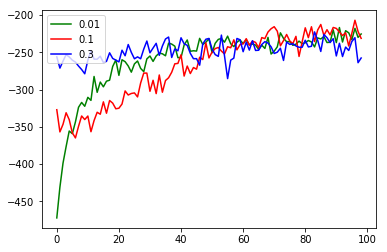

In [15]:
# plt.plot(x_rew, avg_reww)
# plt.xlabel("Episodes")
# plt.ylabel("Average Reward")
# plt.show()
fig, ax = plt.subplots()

ax.plot(avg_reww_0_0_1, color = 'green', label = '0.01')
ax.plot(avg_reww_0_1, color = 'red', label = '0.1')
# ax.plot(avg_reww_0_2, color = 'violet', label = '0.2')
ax.plot(avg_reww_0_3, color = 'blue', label = '0.3')
ax.legend(loc = 'upper left')
plt.show()